# UE22AM342BA2 – Deep Learning on Graph Course Project
## Project Title   :  BiasNet: A Contrastive GNN-Based Framework for Political Stance Detection in News


# 1. Import Libraries

##### Import necessary Python libraries for data manipulation, visualization, text processing, and specific plotting types (word cloud, treemap).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import string
import squarify

# 2. Loading Data and Bias Distribution

In [3]:
df = pd.read_csv("dataset/df_with_embeddings.csv")

<Axes: title={'center': 'Bias Distribution'}, xlabel='bias'>

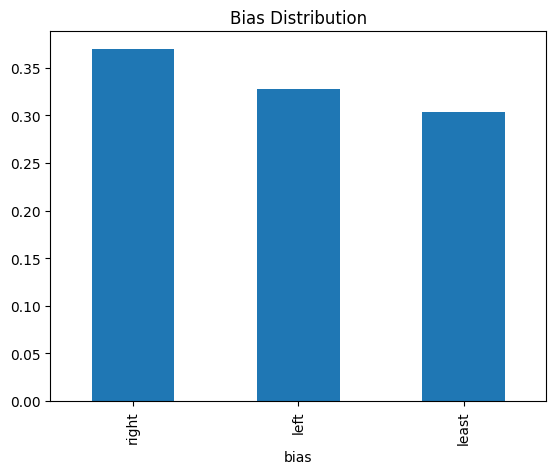

In [4]:
df['bias'].value_counts(normalize=True).plot(kind='bar', title='Bias Distribution')

<Axes: ylabel='source'>

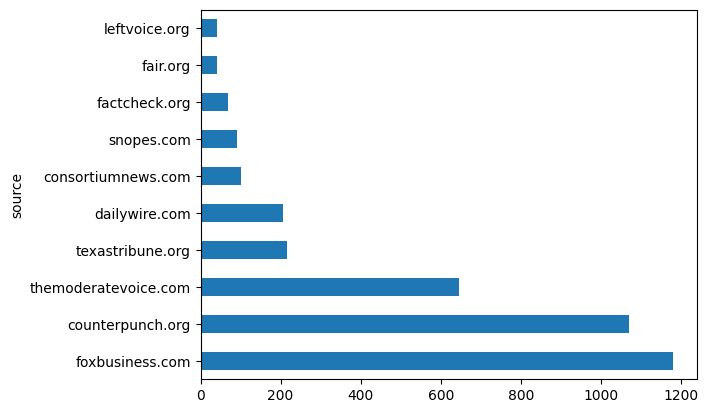

In [5]:
df['source'].value_counts().head(10).plot(kind='barh')

# 3. Generate a Word Cloud from Extracted Text
#####  Generate a word cloud from the text content of the articles to visualize the most frequent words after removing common stop words and punctuation.


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


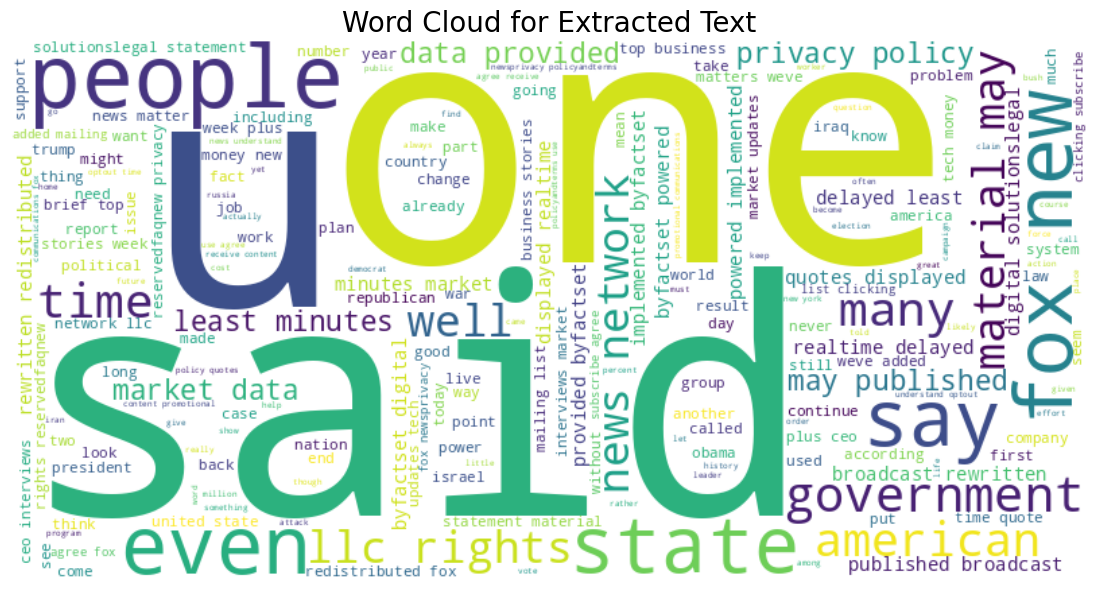

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords

text_data = df['extracted_text'].dropna().astype(str).str.cat(sep=' ')

stop_words = set(stopwords.words('english')).union(set(STOPWORDS))
cleaned_text = ''.join([word.lower() if word not in string.punctuation else '' for word in text_data])
filtered_words = ' '.join([word for word in cleaned_text.split() if word not in stop_words])


wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=200).generate(filtered_words)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Extracted Text", fontsize=20)
plt.show()


# 4. Visualize Hyperpartisan Distribution Across Top 20 Sources
#####  Analyze how hyperpartisan articles are distributed across the most frequent news sources. A hyperpartisan flag likely indicates extremely biased reporting.


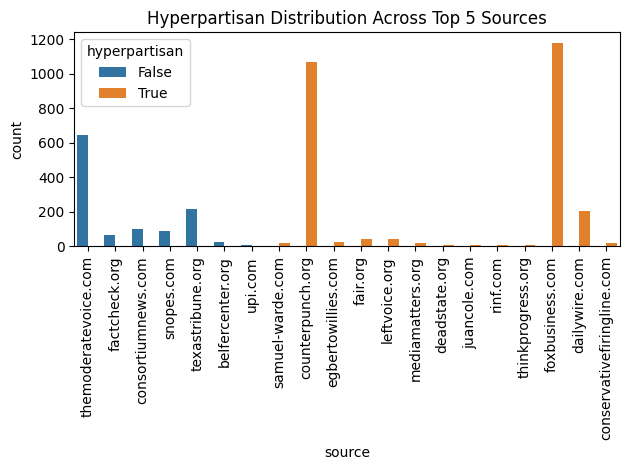

In [7]:

top_sources = df['source'].value_counts().head(20).index
filtered_df = df[df['source'].isin(top_sources)]

sns.countplot(data=filtered_df, x='source', hue='hyperpartisan')
plt.title("Hyperpartisan Distribution Across Top 5 Sources")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()
plt.show()


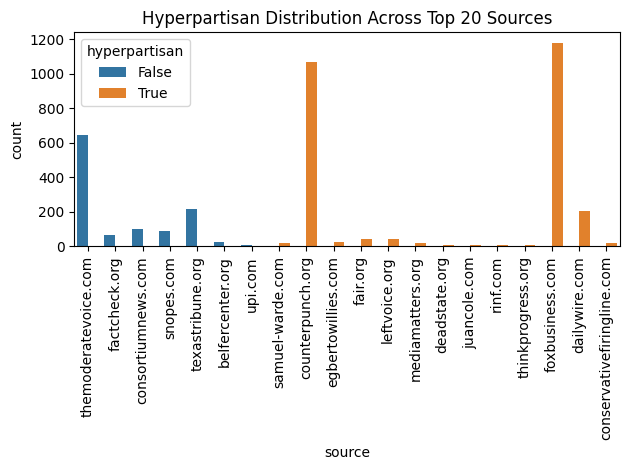

In [8]:
top_sources = df['source'].value_counts().head(20).index
filtered_df = df[df['source'].isin(top_sources)]

sns.countplot(data=filtered_df, x='source', hue='hyperpartisan')
plt.title("Hyperpartisan Distribution Across Top 20 Sources")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()
plt.show()


# 5. Visualize Top 15 Sources Using Treemap

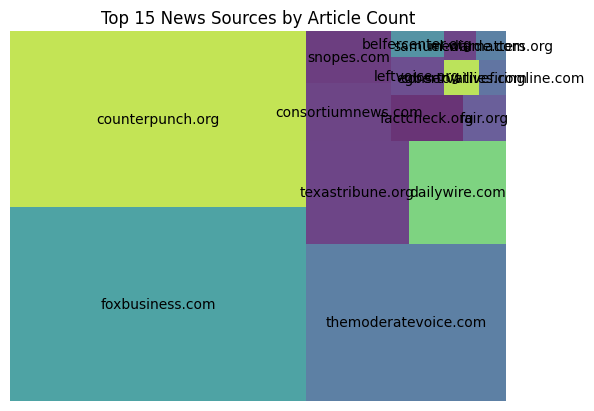

In [9]:
source_counts = df['source'].value_counts().head(15)
squarify.plot(sizes=source_counts.values, label=source_counts.index, alpha=0.8)
plt.axis('off')
plt.title("Top 15 News Sources by Article Count")
plt.show()